# Task1 + Task2 + Task3 +Task4+Task5

Goal of this competition: 

- predict the category of each news. 


Evaluation: 

- Avg value of f1_score. 

- A comparation between submitting category result and real category data 


https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=95703

Task1 赛题理解

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.9.6406111aIKCSLV&postId=118253

Task2 数据读取与数据分析

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=118254

https://github.com/datawhalechina/team-learning-nlp/blob/master/NewsTextClassification/Task3%20%E5%9F%BA%E4%BA%8E%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%9A%84%E6%96%87%E6%9C%AC%E5%88%86%E7%B1%BB.md

Task3 基于机器学习的文本分类

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=118255

Task4 基于深度学习的文本分类1-fastText

https://tianchi.aliyun.com/notebook-ai/?spm=5176.12282024.0.0.432d14ca2Inpak

https://github.com/datawhalechina/team-learning-nlp/tree/master/NewsTextClassification
    
All Task1-6

https://shimo.im/docs/rp3OVnXzDWtpoxAm/read
    
石墨文档大纲

**听课笔记**
- Part1 比赛介绍
- Part2 baseline
- Part3 比赛知识点

一个进行文本分类的数据集。

为什么匿名数据集？
- 没有版权问题；
- 需要从头构建词向量。（不能分词）

思路：（四种方法，由易到难）
- TF-IDF + RidgeClassifier ; (F1_score ~ 0.93)
- FastText ; (F1_score ~ 0.93-0.94)
- Word2Vec + TextCNN ; (F1_score ~ 0.95-0.97)
- Bert.(F1_score ~ 0.98)

思路1 
1 ：将字符进行 TF-IDF (term frequency–inverse document frequency）统计，然后送入线性分类器进行训练；
- CountVectorizer RidgeClassifier
- TfidfVectorizer RidgeClassifier

(tf-idf是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。tf-idf加权的各种形式常被搜索引擎应用，作为文件与用户查询之间相关程度的度量或评级。除了tf-idf以外，互联网上的搜索引擎还会使用基于链接分析的评级方法，以确定文件在搜索结果中出现的顺序。)

Baseline
- 如何继续深入，提高精度？
- 尝试其他机器学习模型；
- 对 TF IDF 和 ngram 进行 gridsearch
- 尝试思路 2 、思路 3 、思路 4

其它尝试和思考：
你能分析得出匿名字符中的标点符号吗？ （可以出现结尾，但不开头）
你知道 NLP 中哪些数据扩增方法呢？（同义词替换，添加某个单词，等等）
线上 F1 打分能到 0.99 吗？

## Understanding and exploratory

In [14]:
import pandas as pd
import numpy as np
import os
import sys

In [15]:
df_testa=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/test_a.csv',sep='\t')

In [16]:
df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t')

In [17]:
df_testa.head().append(df_testa.tail())

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...
49999,2400 4409 4412 2210 5122 4464 7186 2465 1327 9...


In [18]:
df_train.head().append(df_train.tail())

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...
199999,3,4350 3878 3268 1699 6909 5505 2376 2465 6088 2...


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
label    200000 non-null int64
text     200000 non-null object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [20]:
df_testa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
text    50000 non-null object
dtypes: object(1)
memory usage: 390.7+ KB


In [21]:
df_train.describe()

,label
count,200000.000000
mean,3.210950
std,3.084955
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,13.000000


In [22]:
df_testa.describe()

,text
count,50000
unique,49995
top,2538 2506 1363 5466 3772 340 922 433 2397 5778...
freq,4


In [42]:
#In order to know the length of sentences
#The number of words in sentence
%pylab inline
df_train['text_len'] = df_train['text'].apply(lambda x: len(x.split(' ')))
print(df_train['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In resume, this competition gives relatively long sentences. A sentence is composed by 907 words in average, with the minimum length of 2, and the maximum length of 44665 words.

In [25]:
import matplotlib
import matplotlib.pyplot as plt

In [26]:
#df_train

### Viz of sentences' length

Text(0.5, 1.0, 'Histogram of char count')

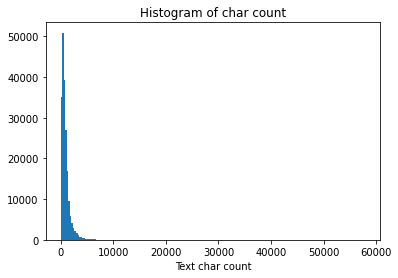

In [27]:
#Viz of sentences' length
_ = plt.hist(df_train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

### Viz of news category

Text(0.5, 0, 'category')

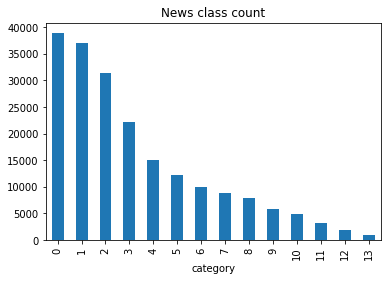

In [28]:
#Viz of news category
df_train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### Word frequencty

In [29]:
from collections import Counter

#### Find the most/least frequent word

In [30]:
all_lines = ' '.join(list(df_train['text']))
type(all_lines)

str

In [31]:
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

In [32]:
print(len(word_count))
# in total there are 6869 words in the dataset

6869


In [33]:
print(word_count[0])
print(word_count[1])
print(word_count[2])
print(word_count[3])
print(word_count[4])

('3750', 7482224)
('648', 4924890)
('900', 3262544)
('3370', 2020958)
('6122', 1602363)


In [34]:
print(word_count[-1])

('3133', 1)


#### Find punctuation marks

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [35]:
df_train['text_unique'] = df_train['text'].apply(lambda x: ' ' .join(list(set(x.split(' ')))))
#df_train

In [36]:
all_lines1 = ' '.join(list(df_train['text_unique']))
word_count1 = Counter(all_lines1.split(" "))
word_count1 = sorted(word_count1.items(), key=lambda d:int(d[1]), reverse = True)

In [37]:
print(word_count1[0])
print(word_count1[1])
print(word_count1[2])
print(word_count1[3])
print(word_count1[4])

('3750', 197997)
('900', 197653)
('648', 191975)
('2465', 177310)
('6122', 176543)


数据分析的结论
通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度；

本章小结
本章对赛题数据进行读取，并新闻句子长度、类别和字符进行了可视化分析。


本章作业
假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [38]:
type(word_count[0][0])
#word_count[0][0]

str

In [39]:
sentence_number = int(word_count[0][0]) + int(word_count[1][0]) + int(word_count[2][0])
sentence_number 

5298

统计每类新闻中出现次数对多的字符

In [43]:
df2 = df_train.groupby(['label'], sort=True)['text_len'].max()
df2

label
0     18587
1     57921
2     41894
3     10817
4     14928
5     15839
6     25728
7     14469
8     15271
9     23866
10    20622
11     5729
12     8737
13     6399
Name: text_len, dtype: int64

# Task3 基于机器学习的文本分类

在上一章节，我们对赛题的数据进行了读取，并在末尾给出了两个小作业。如果你顺利完成了作业，那么你基本上对`Python`也比较熟悉了。在本章我们将使用传统机器学习算法来完成新闻分类的过程，将会结束到赛题的核心知识点。

## 基于机器学习的文本分类

在本章我们将开始使用机器学习模型来解决文本分类。机器学习发展比较广，且包括多个分支，本章侧重使用传统机器学习，从下一章开始是基于深度学习的文本分类。

### 学习目标

- 学会TF-IDF的原理和使用
- 使用sklearn的机器学习模型完成文本分类

### 机器学习模型


机器学习是对能通过经验自动改进的计算机算法的研究。机器学习通过历史数据**训练**出**模型**对应于人类对经验进行**归纳**的过程，机器学习利用**模型**对新数据进行**预测**对应于人类利用总结的**规律**对新问题进行**预测**的过程。

机器学习有很多种分支，对于学习者来说应该优先掌握机器学习算法的分类，然后再其中一种机器学习算法进行学习。由于机器学习算法的分支和细节实在是太多，所以如果你一开始就被细节迷住了眼，你就很难知道全局是什么情况的。

如果你是机器学习初学者，你应该知道如下的事情：

1. 机器学习能解决一定的问题，但不能奢求机器学习是万能的；
2. 机器学习算法有很多种，看具体问题需要什么，再来进行选择；
3. 每种机器学习算法有一定的偏好，需要具体问题具体分析；

![machine_learning_overview](https://img-blog.csdnimg.cn/20200714203223253.jpg)

### 文本表示方法 Part1

在机器学习算法的训练过程中，假设给定$N$个样本，每个样本有$M$个特征，这样组成了$N×M$的样本矩阵，然后完成算法的训练和预测。同样的在计算机视觉中可以将图片的像素看作特征，每张图片看作hight×width×3的特征图，一个三维的矩阵来进入计算机进行计算。

但是在自然语言领域，上述方法却不可行：文本是不定长度的。文本表示成计算机能够运算的数字或向量的方法一般称为词嵌入（Word Embedding）方法。词嵌入将不定长的文本转换到定长的空间内，是文本分类的第一步。

#### One-hot

这里的One-hot与数据挖掘任务中的操作是一致的，即将每一个单词使用一个离散的向量表示。具体将每个字/词编码一个索引，然后根据索引进行赋值。

One-hot表示方法的例子如下：

```python
句子1：我 爱 北 京 天 安 门
句子2：我 喜 欢 上 海
```

首先对所有句子的字进行索引，即将每个字确定一个编号：

```python
{
	'我': 1, '爱': 2, '北': 3, '京': 4, '天': 5,
  '安': 6, '门': 7, '喜': 8, '欢': 9, '上': 10, '海': 11
}
```

在这里共包括11个字，因此每个字可以转换为一个11维度稀疏向量：

```
我：[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
爱：[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
...
海：[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

#### Bag of Words

Bag of Words（词袋表示），也称为Count Vectors，每个文档的字/词可以使用其出现次数来进行表示。

```python
句子1：我 爱 北 京 天 安 门
句子2：我 喜 欢 上 海
```

直接统计每个字出现的次数，并进行赋值：

句子1：我 爱 北 京 天 安 门
转换为 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

句子2：我 喜 欢 上 海
转换为 [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

在sklearn中可以直接`CountVectorizer`来实现这一步骤：

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer() 
vectorizer.fit_transform(corpus).toarray()

# CountVectorizer() : Get the term frequency
# n_gram好像是用来组词的，几个词一组？
#大小写不敏感
#出现的英文词，按alphabet重排序了

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

#### N-gram

N-gram与Count Vectors类似，不过加入了相邻单词组合成为新的单词，并进行计数。

如果N取值为2，则句子1和句子2就变为：

```
句子1：我爱 爱北 北京 京天 天安 安门
句子2：我喜 喜欢 欢上 上海
```

#### TF-IDF

TF-IDF 分数由两部分组成：第一部分是**词语频率**（Term Frequency），第二部分是**逆文档频率**（Inverse Document Frequency）。其中计算语料库中文档总数除以含有该词语的文档数量，然后再取对数就是逆文档频率。

```
TF(t)= 该词语在当前文档出现的次数 / 当前文档中词语的总数
IDF(t)= log_e（文档总数 / 出现该词语的文档总数）
```

### 基于机器学习的文本分类

接下来我们将对比不同文本表示算法的精度，通过本地构建验证集计算F1得分。

#### Count Vectors + RidgeClassifier

In [45]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score 


df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t', nrows=15000)

In [55]:
vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(df_train['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], df_train['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(df_train['label'].values[10000:], val_pred, average='macro'))
#0.654430246247168

0.65441877581244


####  TF-IDF +  RidgeClassifier

In [56]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t', nrows=15000)

In [57]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(df_train['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], df_train['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(df_train['label'].values[10000:], val_pred, average='macro'))

# CountVectorizer() : Get the term frequency
# TfidfVectorizer() : based on CountVectorizer() 
# 需要先用CountVectorizer()
#0.8719372173702

0.8719098297954606


**以下是一个来自Sklearn官方文档的例子**
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

另外还有两个相关文档：
https://scikit-learn.org/stable/modules/feature_extraction.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document']
vocabulary = ['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)), 
                 # CountVectorizer() : 计算文档中所有包括该词的数目
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()
"""
array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]])
"""

'\narray([[1, 1, 1, 1, 0, 1, 0, 0],\n       [1, 2, 0, 1, 1, 1, 0, 0],\n       [1, 0, 0, 1, 0, 1, 1, 1],\n       [1, 1, 1, 1, 0, 1, 0, 0]])\n'

In [59]:
pipe['tfid'].idf_
"""
array([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.        , 1.91629073, 1.91629073])
"""

'\narray([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,\n       1.        , 1.91629073, 1.91629073])\n'

In [60]:
pipe.transform(corpus).shape

"""
(4, 8)
"""

'\n(4, 8)\n'

以《中国的蜜蜂养殖》为例，假定该文长度为1000个词，"中国"、"蜜蜂"、"养殖"各出现20次，则这三个词的"词频"（TF）都为0.02。然后，搜索Google发现，包含"的"字的网页共有250亿张，假定这就是中文网页总数。包含"中国"的网页共有62.3亿张，包含"蜜蜂"的网页为0.484亿张，包含"养殖"的网页为0.973亿张。则它们的逆文档频率（IDF）和TF-IDF如下：

In [61]:
import math

def tfidf(wtermfreq, alltermfreq, wdocfreq, alldocfreq):
    tf = round(wtermfreq/alltermfreq,4)
    idf = round(math.log10(wdocfreq/(alldocfreq+1)),4)
    tfidf = round(tf*idf,4) 
    print ("tf="+str(tf)+",","idf="+str(idf)+",","tfidf="+str(tfidf))

#中国
tfidf(20,1000,250*10**8,62.3*10**8)

#蜜蜂
tfidf(20,1000,250*10**8,0.484*10**8)

#养殖
tfidf(20,1000,250*10**8,0.973*10**8)

tf=0.02, idf=0.6035, tfidf=0.0121
tf=0.02, idf=2.7131, tfidf=0.0543
tf=0.02, idf=2.4098, tfidf=0.0482


从上表可见，"蜜蜂"的TF-IDF值最高，"养殖"其次，"中国"最低。（如果还计算"的"字的TF-IDF，那将是一个极其接近0的值。）所以，如果只选择一个词，"蜜蜂"就是这篇文章的关键词。

除了自动提取关键词，TF-IDF算法还可以用于许多别的地方。比如，信息检索时，对于每个文档，都可以分别计算一组搜索词（"中国"、"蜜蜂"、"养殖"）的TF-IDF，将它们相加，就可以得到整个文档的TF-IDF。这个值最高的文档就是与搜索词最相关的文档。
TF-IDF算法的优点是简单快速，结果比较符合实际情况。缺点是，单纯以"词频"衡量一个词的重要性，不够全面，有时重要的词可能出现次数并不多。而且，这种算法无法体现词的位置信息，出现位置靠前的词与出现位置靠后的词，都被视为重要性相同，这是不正确的。（一种解决方法是，对全文的第一段和每一段的第一句话，给予较大的权重。）


### 本章小结

本章我们介绍了基于机器学习的文本分类方法，并完成了两种方法的对比。

### 本章作业

1. 尝试改变TF-IDF的参数，并验证精度
2. 尝试使用其他机器学习模型，完成训练和验证

1. 尝试改变TF-IDF的参数，并验证精度

https://scikit-learn.org/stable/modules/feature_extraction.html
看paramater部分，调参数

1.1. 
TF-IDF + RidgeClassifier 
把总数据量调大

In [14]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

df_train1=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t')

In [63]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))


0.9016880865055513


1.2. 
TF-IDF + RidgeClassifier 
在1.1的基础上把max_feature调大

In [64]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

0.9520909774028781


In [15]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

0.9520985727964899


In [ ]:
train_test.info()

In [ ]:
print("hello")

In [ ]:
# 导出预测结果
test_a = pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/test_a.csv',sep='\t')

In [ ]:
test_a_tfidf = tfidf.fit_transform(test_a['text'])
df = pd.Dataframe()
df['label'] = clf.predict(test_a_tfidf)
df_to_csv('submit.csv', index=None)

1.3. 
TF-IDF + RidgeClassifier 
在1.1的基础上把ngram_range和max_feature调大

In [65]:
tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=4000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

0.9099982540691449


2.尝试使用其他机器学习模型，完成训练和验证

分类器总结
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [66]:
#tfidf + LR
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = LogisticRegression()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

C:\Users\xingy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xingy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9383878432526526


In [67]:
#tfidf + svm.linearSVR
from sklearn.svm import LinearSVR

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = LinearSVR()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
#tfidf + svm.SVC
from sklearn.svm import SVC

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = SVC()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + knn_classifier
from sklearn.neighbors import KNeighborsClassifier
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = KNeighborsClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + DT_classifier
from sklearn.tree import DecisionTreeClassifier
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = DecisionTreeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + GBDT_classifier
from sklearn.ensemble import GradientBoostingRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = GradientBoostingRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + RF_classifier
from sklearn.ensemble import RandomForestRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RandomForestRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + Xgboost_classifier
from sklearn.tree import RandomForestRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RandomForestRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + MLPClassifier
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = MLPClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

Gridsearch for SVM

In [ ]:
#tfidf + svm.linearSVR(gridsearch)
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
train_test = tfidf.fit_transform(df_train1['text'])

parameters = {"gamma":[0.001,0.01,0.1,1,10,100], "C":[0.001,0.01,0.1,1,10,100]}
clf = LinearSVR(gamma, C, cv=5)
clf.fit(train_test[:], df_train1['label'].values[:])
clf.best_params_


In [ ]:
#model = LinearSVR(gamma=x, C=y)

In [ ]:
#val_pred = clf.predict(train_test[:])
#print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

# Task4 基于深度学习的文本分类1

在上一章节，我们使用传统机器学习算法来解决了文本分类问题，从本章开始我们将尝试使用深度学习方法。

## 基于深度学习的文本分类

与传统机器学习不同，深度学习既提供特征提取功能，也可以完成分类的功能。从本章开始我们将学习如何使用深度学习来完成文本表示。

### 学习目标

- 学习FastText的使用和基础原理
- 学会使用验证集进行调参

### 文本表示方法 Part2

#### 现有文本表示方法的缺陷

在上一章节，我们介绍几种文本表示方法：

- One-hot
- Bag of Words
- N-gram
- TF-IDF

也通过sklean进行了相应的实践，相信你也有了初步的认知。但上述方法都或多或少存在一定的问题：转换得到的向量维度很高，需要较长的训练实践；没有考虑单词与单词之间的关系，只是进行了统计。

与这些表示方法不同，深度学习也可以用于文本表示，还可以将其映射到一个低纬空间。其中比较典型的例子有：FastText、Word2Vec和Bert。在本章我们将介绍FastText，将在后面的内容介绍Word2Vec和Bert。

#### FastText

FastText是一种典型的深度学习词向量的表示方法，它非常简单通过Embedding层将单词映射到稠密空间，然后将句子中所有的单词在Embedding空间中进行平均，进而完成分类操作。

所以FastText是一个三层的神经网络，输入层、隐含层和输出层。

![fast_text](https://img-blog.csdnimg.cn/20200714204856589.png)

下图是使用keras实现的FastText网络结构：

![keras_fasttext](https://img-blog.csdnimg.cn/20200714204249463.jpg)

FastText在文本分类任务上，是优于TF-IDF的：

- FastText用单词的Embedding叠加获得的文档向量，将相似的句子分为一类
- FastText学习到的Embedding空间维度比较低，可以快速进行训练

如果想深度学习，可以参考论文：

Bag of Tricks for Efficient Text Classification, https://arxiv.org/abs/1607.01759

### 基于FastText的文本分类

FastText可以快速的在CPU上进行训练，最好的实践方法就是官方开源的版本：
https://github.com/facebookresearch/fastText/tree/master/python

- pip安装

```
pip install fasttext
```

```
conda install -c mbednarski fasttext
```

- 源码安装

```
git clone https://github.com/facebookresearch/fastText.git
cd fastText
sudo pip install .
```

两种安装方法都可以安装，如果你是初学者可以优先考虑使用pip安装。

- 分类模型

In [17]:
import pandas as pd
from sklearn.metrics import f1_score

# 转换为FastText需要的格式
df_train = pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv', sep='\t', nrows=15000)
df_train['label_ft'] = '__label__' + df_train['label'].astype(str)
df_train[['text','label_ft']].iloc[:-5000].to_csv('train.csv', index=None, header=None, sep='\t')

In [18]:
import fasttext

In [19]:
model = fasttext.train_supervised('train.csv', lr=1.0, wordNgrams=2, 
                                  verbose=2, minCount=1, epoch=25, loss="hs")

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in df_train.iloc[-5000:]['text']]
print(f1_score(df_train['label'].values[-5000:].astype(str), val_pred, average='macro'))
# 0.8238894886303253

0.8216295413400136


此时数据量比较小得分为0.82，当不断增加训练集数量时，FastText的精度也会不断增加5w条训练样本时，验证集得分可以到0.89-0.90左右。

In [22]:
import pandas as pd
from sklearn.metrics import f1_score

# 转换为FastText需要的格式
df_train = pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv', sep='\t') #, nrows=15000, 把数据加多
df_train['label_ft'] = '__label__' + df_train['label'].astype(str)
df_train[['text','label_ft']].iloc[:-5000].to_csv('train.csv', index=None, header=None, sep='\t')


# 用FastText建模型
import fasttext

model = fasttext.train_supervised('train.csv', lr=1.0, wordNgrams=2, 
                                  verbose=2, minCount=1, epoch=25, loss="hs")

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in df_train.iloc[-5000:]['text']]
print(f1_score(df_train['label'].values[-5000:].astype(str), val_pred, average='macro'))
# 0.9097346804322758
# 好像用了至少半个小时

0.9097346804322758


### 如何使用验证集调参

在使用TF-IDF和FastText中，有一些模型的参数需要选择，这些参数会在一定程度上影响模型的精度，那么如何选择这些参数呢？

- 通过阅读文档，要弄清楚这些参数的大致含义，那些参数会增加模型的复杂度
- 通过在验证集上进行验证模型精度，找到模型在是否过拟合还是欠拟合

![train_val](https://img-blog.csdnimg.cn/20200714204403844.png)

这里我们使用10折交叉验证，每折使用9/10的数据进行训练，剩余1/10作为验证集检验模型的效果。这里需要注意每折的划分必须保证标签的分布与整个数据集的分布一致。

```python
label2id = {}
for i in range(total):
    label = str(all_labels[i])
    if label not in label2id:
        label2id[label] = [i]
    else:
        label2id[label].append(i)
```

通过10折划分，我们一共得到了10份分布一致的数据，索引分别为0到9，每次通过将一份数据作为验证集，剩余数据作为训练集，获得了所有数据的10种分割。不失一般性，我们选择最后一份完成剩余的实验，即索引为9的一份做为验证集，索引为1-8的作为训练集，然后基于验证集的结果调整超参数，使得模型性能更优。

### 本章小结

本章介绍了FastText的原理和基础使用，并进行相应的实践。然后介绍了通过10折交叉验证划分数据集。

### 本章作业

- 阅读FastText的文档，尝试修改参数，得到更好的分数
- 基于验证集的结果调整超参数，使得模型性能更优

文档在这
https://pypi.org/project/fasttext/

In [ ]:
df_train = pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv', sep='\t', nrows=15000) 

import fasttext

for lr in [0.1, 0.5, 1]: 
    for dim in [100, 200, 300]: 
        for minCount in [2, 3, 4]: 
            print("lr=%.1f, dim=%d, minCount=%d"%(lr,dim,minCount))
            model = fasttext.train_supervised('train.csv', lr=lr, wordNgrams=2, dim=dim, minCount=minCount, epoch=50, loss='hs')
            val_pred = [model.predict(x)[0][0].split('__')[-1] for x in df_train.iloc[-5000:]['text']]
            print(f1_score(df_train['label'].values[-5000:].astype(str), val_pred, average='macro'))


#原来的参数

#lr=1.0, 
#wordNgrams=2
#verbose=2, 
#minCount=1, 
#epoch=25, 
#loss="hs", 
#dim=100 # size of word vectors [100]

lr=0.1, dim=100, minCount=2
0.9856942272723739
lr=0.1, dim=100, minCount=3
0.9859750049975563
lr=0.1, dim=100, minCount=4
0.9859750049975563
lr=0.1, dim=200, minCount=2


# Task5 基于深度学习的文本分类2

在上一章节，我们通过FastText快速实现了基于深度学习的文本分类模型，但是这个模型并不是最优的。在本章我们将继续深入。

## 基于深度学习的文本分类

本章将继续学习基于深度学习的文本分类。

### 学习目标

- 学习Word2Vec的使用和基础原理
- 学习使用TextCNN、TextRNN进行文本表示
- 学习使用HAN网络结构完成文本分类

### 文本表示方法 Part3

#### 词向量

本节通过word2vec学习词向量。word2vec模型背后的基本思想是对出现在上下文环境里的词进行预测。对于每一条输入文本，我们选取一个上下文窗口和一个中心词，并基于这个中心词去预测窗口里其他词出现的概率。因此，word2vec模型可以方便地从新增语料中学习到新增词的向量表达，是一种高效的在线学习算法（online learning）。

word2vec的主要思路：通过单词和上下文彼此预测，对应的两个算法分别为：

* Skip-grams (SG)：预测上下文
* Continuous Bag of Words (CBOW)：预测目标单词

另外提出两种更加高效的训练方法：

* Hierarchical softmax

* Negative sampling

**1. Skip-grams原理和网络结构**

Word2Vec模型中，主要有Skip-Gram和CBOW两种模型，从直观上理解，Skip-Gram是给定input word来预测上下文。而CBOW是给定上下文，来预测input word。

Word2Vec模型中，主要有Skip-Gram和CBOW两种模型，从直观上理解，Skip-Gram是给定input word来预测上下文。而CBOW是给定上下文，来预测input word。

![skip_grams](https://img-blog.csdnimg.cn/20200714210354729.png)

Word2Vec模型实际上分为了两个部分，第一部分为建立模型，第二部分是通过模型获取嵌入词向量。

Word2Vec的整个建模过程实际上与自编码器（auto-encoder）的思想很相似，即先基于训练数据构建一个神经网络，当这个模型训练好以后，我们并不会用这个训练好的模型处理新的任务，我们真正需要的是这个模型通过训练数据所学得的参数，例如隐层的权重矩阵——后面我们将会看到这些权重在Word2Vec中实际上就是我们试图去学习的“word vectors”。

Skip-grams过程

假如我们有一个句子“The dog barked at the mailman”。

1. 首先我们选句子中间的一个词作为我们的输入词，例如我们选取“dog”作为input word；

2. 有了input word以后，我们再定义一个叫做skip_window的参数，它代表着我们从当前input word的一侧（左边或右边）选取词的数量。如果我们设置skip_window=2，那么我们最终获得窗口中的词（包括input word在内）就是['The', 'dog'，'barked', 'at']。skip_window=2代表着选取左input word左侧2个词和右侧2个词进入我们的窗口，所以整个窗口大小span=2x2=4。另一个参数叫num_skips，它代表着我们从整个窗口中选取多少个不同的词作为我们的output word，当skip_window=2，num_skips=2时，我们将会得到两组 (input word, output word) 形式的训练数据，即 ('dog', 'barked')，('dog', 'the')。

3. 神经网络基于这些训练数据将会输出一个概率分布，这个概率代表着我们的词典中的每个词作为input word的output word的可能性。这句话有点绕，我们来看个例子。第二步中我们在设置skip_window和num_skips=2的情况下获得了两组训练数据。假如我们先拿一组数据 ('dog', 'barked') 来训练神经网络，那么模型通过学习这个训练样本，会告诉我们词汇表中每个单词当'dog'作为input word时，其作为output word的可能性。

也就是说模型的输出概率代表着到我们词典中每个词有多大可能性跟input word同时出现。例如：如果我们向神经网络模型中输入一个单词“Soviet“，那么最终模型的输出概率中，像“Union”， ”Russia“这种相关词的概率将远高于像”watermelon“，”kangaroo“非相关词的概率。因为”Union“，”Russia“在文本中更大可能在”Soviet“的窗口中出现。

我们将通过给神经网络输入文本中成对的单词来训练它完成上面所说的概率计算。下面的图中给出了一些我们训练样本的例子。我们选定句子“The quick brown fox jumps over lazy dog”，设定我们的窗口大小为2（window_size=2），也就是说我们仅选输入词前后各两个词和输入词进行组合。下图中，蓝色代表input word，方框内代表位于窗口内的单词。

![1](https://img-blog.csdnimg.cn/20200721190035764.png)

![2](https://img-blog.csdnimg.cn/20200714210519939.png)

我们的模型将会从每对单词出现的次数中习得统计结果。例如，我们的神经网络可能会得到更多类似（“Soviet“，”Union“）这样的训练样本对，而对于（”Soviet“，”Sasquatch“）这样的组合却看到的很少。因此，当我们的模型完成训练后，给定一个单词”Soviet“作为输入，输出的结果中”Union“或者”Russia“要比”Sasquatch“被赋予更高的概率。

PS：input word和output word都会被我们进行one-hot编码。仔细想一下，我们的输入被one-hot编码以后大多数维度上都是0（实际上仅有一个位置为1），所以这个向量相当稀疏，那么会造成什么结果呢。如果我们将一个1 x 10000的向量和10000 x 300的矩阵相乘，它会消耗相当大的计算资源，为了高效计算，它仅仅会选择矩阵中对应的向量中维度值为1的索引行：

![](https://img-blog.csdnimg.cn/20200714205344406.png)

**2. Skip-grams训练**

由上部分可知，Word2Vec模型是一个超级大的神经网络（权重矩阵规模非常大）。例如：我们拥有10000个单词的词汇表，我们如果想嵌入300维的词向量，那么我们的输入-隐层权重矩阵和隐层-输出层的权重矩阵都会有 10000 x 300 = 300万个权重，在如此庞大的神经网络中进行梯度下降是相当慢的。更糟糕的是，你需要大量的训练数据来调整这些权重并且避免过拟合。百万数量级的权重矩阵和亿万数量级的训练样本意味着训练这个模型将会是个灾难

解决方案：

* 将常见的单词组合（word pairs）或者词组作为单个“words”来处理

* 对高频次单词进行抽样来减少训练样本的个数

* 对优化目标采用“negative sampling”方法，这样每个训练样本的训练只会更新一小部分的模型权重，从而降低计算负担

*2.1 Word pairs and "phases"*

一些单词组合（或者词组）的含义和拆开以后具有完全不同的意义。比如“Boston Globe”是一种报刊的名字，而单独的“Boston”和“Globe”这样单个的单词却表达不出这样的含义。因此，在文章中只要出现“Boston Globe”，我们就应该把它作为一个单独的词来生成其词向量，而不是将其拆开。同样的例子还有“New York”，“United Stated”等。

在Google发布的模型中，它本身的训练样本中有来自Google News数据集中的1000亿的单词，但是除了单个单词以外，单词组合（或词组）又有3百万之多。

*2.2 对高频词抽样*

在上一部分中，对于原始文本为“The quick brown fox jumps over the laze dog”，如果使用大小为2的窗口，那么我们可以得到图中展示的那些训练样本。

![1](https://img-blog.csdnimg.cn/20200714210458879.png)

但是对于“the”这种常用高频单词，这样的处理方式会存在下面两个问题：

1. 当我们得到成对的单词训练样本时，("fox", "the") 这样的训练样本并不会给我们提供关于“fox”更多的语义信息，因为“the”在每个单词的上下文中几乎都会出现

2. 由于在文本中“the”这样的常用词出现概率很大，因此我们将会有大量的（”the“，…）这样的训练样本，而这些样本数量远远超过了我们学习“the”这个词向量所需的训练样本数

Word2Vec通过“抽样”模式来解决这种高频词问题。它的基本思想如下：对于我们在训练原始文本中遇到的每一个单词，它们都有一定概率被我们从文本中删掉，而这个被删除的概率与单词的频率有关。

ωi 是一个单词，Z(ωi) 是 ωi 这个单词在所有语料中出现的频次，例如：如果单词“peanut”在10亿规模大小的语料中出现了1000次，那么 Z(peanut) = 1000/1000000000 = 1e - 6。

P(ωi) 代表着保留某个单词的概率：

![](https://img-blog.csdnimg.cn/20200714205456898.png)

*2.3 Negative sampling*

训练一个神经网络意味着要输入训练样本并且不断调整神经元的权重，从而不断提高对目标的准确预测。每当神经网络经过一个训练样本的训练，它的权重就会进行一次调整。

所以，词典的大小决定了我们的Skip-Gram神经网络将会拥有大规模的权重矩阵，所有的这些权重需要通过数以亿计的训练样本来进行调整，这是非常消耗计算资源的，并且实际中训练起来会非常慢。

负采样（negative sampling）解决了这个问题，它是用来提高训练速度并且改善所得到词向量的质量的一种方法。不同于原本每个训练样本更新所有的权重，负采样每次让一个训练样本仅仅更新一小部分的权重，这样就会降低梯度下降过程中的计算量。

当我们用训练样本 ( input word: "fox"，output word: "quick") 来训练我们的神经网络时，“ fox”和“quick”都是经过one-hot编码的。如果我们的词典大小为10000时，在输出层，我们期望对应“quick”单词的那个神经元结点输出1，其余9999个都应该输出0。在这里，这9999个我们期望输出为0的神经元结点所对应的单词我们称为“negative” word。

当使用负采样时，我们将随机选择一小部分的negative words（比如选5个negative words）来更新对应的权重。我们也会对我们的“positive” word进行权重更新（在我们上面的例子中，这个单词指的是”quick“）。

PS: 在论文中，作者指出指出对于小规模数据集，选择5-20个negative words会比较好，对于大规模数据集可以仅选择2-5个negative words。

我们使用“一元模型分布（unigram distribution）”来选择“negative words”。个单词被选作negative sample的概率跟它出现的频次有关，出现频次越高的单词越容易被选作negative words。

每个单词被选为“negative words”的概率计算公式：


![](https://img-blog.csdnimg.cn/20200714205545327.png)

其中 f(ωi)代表着单词出现的频次，而公式中开3/4的根号完全是基于经验的。

在代码负采样的代码实现中，unigram table有一个包含了一亿个元素的数组，这个数组是由词汇表中每个单词的索引号填充的，并且这个数组中有重复，也就是说有些单词会出现多次。那么每个单词的索引在这个数组中出现的次数该如何决定呢，有公式，也就是说计算出的负采样概率*1亿=单词在表中出现的次数。

有了这张表以后，每次去我们进行负采样时，只需要在0-1亿范围内生成一个随机数，然后选择表中索引号为这个随机数的那个单词作为我们的negative word即可。一个单词的负采样概率越大，那么它在这个表中出现的次数就越多，它被选中的概率就越大。

**3. Hierarchical Softmax**

*3.1 霍夫曼树*

输入：权值为(w1,w2,…wn)的n个节点

输出：对应的霍夫曼树

1. 将(w1,w2,…wn)看做是有n棵树的森林，每个树仅有一个节点

2. 在森林中选择根节点权值最小的两棵树进行合并，得到一个新的树，这两颗树分布作为新树的左右子树。新树的根节点权重为左右子树的根节点权重之和

3. 将之前的根节点权值最小的两棵树从森林删除，并把新树加入森林

4. 重复步骤 2 和 3 直到森林里只有一棵树为止

下面我们用一个具体的例子来说明霍夫曼树建立的过程，我们有(a，b，c，d，e，f)共6个节点，节点的权值分布是(16，4，8，6，20，3)。

首先是最小的b和f合并，得到的新树根节点权重是7.此时森林里5棵树，根节点权重分别是16，8，6，20，7。此时根节点权重最小的6，7合并，得到新子树，依次类推，最终得到下面的霍夫曼树。

![3](https://img-blog.csdnimg.cn/20200714210647687.png)

那么霍夫曼树有什么好处呢？一般得到霍夫曼树后我们会对叶子节点进行霍夫曼编码，由于权重高的叶子节点越靠近根节点，而权重低的叶子节点会远离根节点，这样我们的高权重节点编码值较短，而低权重值编码值较长。这保证的树的带权路径最短，也符合我们的信息论，即我们希望越常用的词拥有更短的编码。如何编码呢？一般对于一个霍夫曼树的节点（根节点除外），可以约定左子树编码为0，右子树编码为1。如上图，则可以得到c的编码是00。

在word2vec中，约定编码方式和上面的例子相反，即约定左子树编码为1，右子树编码为0，同时约定左子树的权重不小于右子树的权重。

更多原理可参考：[霍夫曼树原理](https://blog.csdn.net/lzw66666/article/details/78934893)

*3.2Hierarchical Softmax过程*

为了避免要计算所有词的softmax概率，word2vec采样了霍夫曼树来代替从隐藏层到输出softmax层的映射。

霍夫曼树的建立：

* 根据标签（label）和频率建立霍夫曼树（label出现的频率越高，Huffman树的路径越短）

* Huffman树中每一叶子结点代表一个label

![4](https://img-blog.csdnimg.cn/20200714205623583.png)

如上图所示：

![](https://img-blog.csdnimg.cn/20200714205711676.png)

![](https://img-blog.csdnimg.cn/20200714205759860.png)

注意：此时的theta是一个待定系数，它是由推导最大似然之后求解得到迭代式子。

![](https://img-blog.csdnimg.cn/20200714205841871.png)

**使用gensim训练word2vec**

In [20]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(sentences, workers=num_workers, size=num_features)

**参考：**

1. [CS224n笔记2 词的向量表示：word2vec](http://www.hankcs.com/nlp/word-vector-representations-word2vec.html)

2. [斯坦福大学深度学习与自然语言处理第二讲：词向量 ](http://www.52nlp.cn/%E6%96%AF%E5%9D%A6%E7%A6%8F%E5%A4%A7%E5%AD%A6%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E4%B8%8E%E8%87%AA%E7%84%B6%E8%AF%AD%E8%A8%80%E5%A4%84%E7%90%86%E7%AC%AC%E4%BA%8C%E8%AE%B2%E8%AF%8D%E5%90%91%E9%87%8F)

3. [(Stanford CS224d) Deep Learning and NLP课程笔记（三）：GloVe与模型的评估](https://www.cnblogs.com/iloveai/p/cs224d-lecture3-note.html)

4. [http://www.cnblogs.com/pinard/p/7249903.html](http://www.cnblogs.com/pinard/p/7249903.html)

5. [https://blog.csdn.net/yinkun6514/article/details/79218736](https://blog.csdn.net/yinkun6514/article/details/79218736)

6. [https://www.leiphone.com/news/201706/PamWKpfRFEI42McI.html](https://www.leiphone.com/news/201706/PamWKpfRFEI42McI.html)

#### TextCNN

TextCNN利用CNN（卷积神经网络）进行文本特征抽取，不同大小的卷积核分别抽取n-gram特征，卷积计算出的特征图经过MaxPooling保留最大的特征值，然后将拼接成一个向量作为文本的表示。

这里我们基于TextCNN原始论文的设定，分别采用了100个大小为2,3,4的卷积核，最后得到的文本向量大小为100*3=300维。

![](https://img-blog.csdnimg.cn/20200714205932720.jpeg)

#### TextRNN

TextRNN利用RNN（循环神经网络）进行文本特征抽取，由于文本本身是一种序列，而LSTM天然适合建模序列数据。TextRNN将句子中每个词的词向量依次输入到双向双层LSTM，分别将两个方向最后一个有效位置的隐藏层拼接成一个向量作为文本的表示。

![5](https://img-blog.csdnimg.cn/20200714210806492.png)

### 基于TextCNN、TextRNN的文本表示

#### TextCNN

TextCNN利用CNN（卷积神经网络）进行文本特征抽取，不同大小的卷积核分别抽取n-gram特征，卷积计算出的特征图经过MaxPooling保留最大的特征值，然后将拼接成一个向量作为文本的表示。

这里我们基于TextCNN原始论文的设定，分别采用了100个大小为2,3,4的卷积核，最后得到的文本向量大小为100*3=300维。

![](https://img-blog.csdnimg.cn/20200714205932720.jpeg)

#### TextRNN

TextRNN利用RNN（循环神经网络）进行文本特征抽取，由于文本本身是一种序列，而LSTM天然适合建模序列数据。TextRNN将句子中每个词的词向量依次输入到双向双层LSTM，分别将两个方向最后一个有效位置的隐藏层拼接成一个向量作为文本的表示。

![5](https://img-blog.csdnimg.cn/20200714210806492.png)

### 基于TextCNN、TextRNN的文本表示

#### TextCNN

* 模型搭建

In [15]:
self.filter_sizes = [2, 3, 4]  # n-gram window
self.out_channel = 100
self.convs = nn.ModuleList([nn.Conv2d(1, self.out_channel, (filter_size, input_size), bias=True) for filter_size in self.filter_sizes])

NameError: name 'self' is not defined

* 前向传播

In [16]:
pooled_outputs = []
for i in range(len(self.filter_sizes)):
    filter_height = sent_len - self.filter_sizes[i] + 1
    conv = self.convs[i](batch_embed)
    hidden = F.relu(conv)  # sen_num x out_channel x filter_height x 1

    mp = nn.MaxPool2d((filter_height, 1))  # (filter_height, filter_width)
    # sen_num x out_channel x 1 x 1 -> sen_num x out_channel
    pooled = mp(hidden).reshape(sen_num, self.out_channel)
    
    pooled_outputs.append(pooled)

NameError: name 'self' is not defined

#### TextRNN

* 模型搭建

input_size = config.word_dims

self.word_lstm = LSTM(
    input_size=input_size,
    hidden_size=config.word_hidden_size,
    num_layers=config.word_num_layers,
    batch_first=True,
    bidirectional=True,
    dropout_in=config.dropout_input,
    dropout_out=config.dropout_hidden,
)

* 前向传播

hiddens, _ = self.word_lstm(batch_embed, batch_masks)  # sent_len x sen_num x hidden*2
hiddens.transpose_(1, 0)  # sen_num x sent_len x hidden*2

if self.training:
    hiddens = drop_sequence_sharedmask(hiddens, self.dropout_mlp)

### 使用HAN用于文本分类

[Hierarchical Attention Network for Document Classification](https://link.zhihu.com/?target=http%3A//www.aclweb.org/anthology/N16-1174)(HAN)基于层级注意力，在单词和句子级别分别编码并基于注意力获得文档的表示，然后经过Softmax进行分类。其中word encoder的作用是获得句子的表示，可以替换为上节提到的TextCNN和TextRNN，也可以替换为下节中的BERT。

![Sequence Intent Classification Using Hierarchical Attention...](https://img-blog.csdnimg.cn/20200714210015326.png)

### 本章小结

本章介绍了Word2Vec的使用，以及TextCNN、TextRNN的原理和训练，最后介绍了用于长文档分类的HAN。

### 本章作业

- 尝试通过Word2Vec训练词向量
- 尝试使用TextCNN、TextRNN完成文本表示
- 尝试使用HAN进行文本分类

**参考：**

1. https://mp.weixin.qq.com/s/I-yeHQopTFdNk67Ir_iWiA
2. https://github.com/hecongqing/2018-daguan-competition

# Task6 基于深度学习的文本分类3

## 基于深度学习的文本分类

### 学习目标

- 了解Transformer的原理和基于预训练语言模型（Bert）的词表示
- 学会Bert的使用，具体包括pretrain和finetune

### 文本表示方法Part4

#### Transformer原理

Transformer是在"[Attention is All You Need](https://arxiv.org/abs/1706.03762)"中提出的，模型的编码部分是一组编码器的堆叠（论文中依次堆叠六个编码器），模型的解码部分是由相同数量的解码器的堆叠。

![](https://img-blog.csdnimg.cn/20200714211046668.png)

我们重点关注编码部分。他们结构完全相同，但是并不共享参数，每一个编码器都可以拆解成两部分。在对输入序列做词的向量化之后，它们首先流过一个self-attention层，该层帮助编码器在它编码单词的时候能够看到输入序列中的其他单词。self-attention的输出流向一个前向网络（Feed Forward Neural Network），每个输入位置对应的前向网络是独立互不干扰的。最后将输出传入下一个编码器。

![](https://img-blog.csdnimg.cn/20200714211115945.png)

这里能看到Transformer的一个关键特性，每个位置的词仅仅流过它自己的编码器路径。在self-attention层中，这些路径两两之间是相互依赖的。**前向网络层则没有这些依赖性**，但这些路径在流经前向网络时可以并行执行。

Self-Attention中使用多头机制，使得不同的attention heads所关注的的部分不同。

![](https://img-blog.csdnimg.cn/20200714211153687.png)

编码"it"时，一个attention head集中于"the animal"，另一个head集中于“tired”，某种意义上讲，模型对“it”的表达合成了的“animal”和“tired”两者。

对于自注意力的详细计算，欢迎大家参考[Jay Alammar](https://jalammar.github.io/illustrated-transformer/)关于Transformer的博客，这里不再展开。


除此之外，为了使模型保持单词的语序，模型中添加了位置编码向量。如下图所示，每行对应一个向量的位置编码。因此，第一行将是我们要添加到输入序列中第一个单词的嵌入的向量。每行包含512个值—每个值都在1到-1之间。因为左侧是用sine函数生成，右侧是用cosine生成，所以可以观察到中间显著的分隔。

![](https://img-blog.csdnimg.cn/20200714211232716.png)

编码器结构中值得提出注意的一个细节是，在每个子层中（Self-attention, FFNN），都有残差连接，并且紧跟着[layer-normalization](https://arxiv.org/abs/1607.06450)。如果我们可视化向量和LayerNorm操作，将如下所示：

![](https://img-blog.csdnimg.cn/20200714211955713.png)

#### 基于预训练语言模型的词表示

基于预训练语言模型的词表示由于可以建模上下文信息，进而解决传统静态词向量不能建模“一词多义”语言现象的问题。最早提出的ELMo基于两个单向LSTM，将从左到右和从右到左两个方向的隐藏层向量表示拼接学习上下文词嵌入。而GPT用Transformer代替LSTM作为编码器，首先进行了语言模型预训练，然后在下游任务微调模型参数。但GPT由于仅使用了单向语言模型，因此难以建模上下文信息。为了解决以上问题，研究者们提出了BERT，BERT模型结构如下图所示，它是一个基于Transformer的多层Encoder，通过执行一系列预训练，进而得到深层的上下文表示。

![bert_elmo](https://img-blog.csdnimg.cn/20200714211316167.png)

ELMo论文题目中Deep是指双向双层LSTM，而更关键的在于context。传统方法生成的单词映射表的形式，即先为每个单词生成一个静态的词向量，之后这个单词的表示就被固定住了，不会跟着上下文的变化而做出改变。事实上，由于一词多义的语言现象，静态词向量是有很大的弊端的。以bank为例，如果训练语料的足够大，事先学好的词向量中混杂着所有的语义。而当下游应用时，即使在新句子中，bank的上下文里包含money等词，我们基本可以确定bank是“银行”的语义而不是在其他上下文中的“河床”的语义，但是由于静态词向量不能跟随上下文而进行变化，所以bank的表示中还是混杂着多种语义。为了解决这一问题，ELMo首先进行了语言模型预训练，然后在下游任务中动态调整Word Embedding，因此最后输出的词表示能够充分表达单词在上下文中的特定语义，进而解决一词多义的问题。

GPT来自于openai，是一种生成式预训练模型。GPT 除了将ELMo中的LSTM替换为Transformer 的Encoder外，更开创了NLP界基于预训练-微调的新范式。尽管GPT采用的也是和ELMo相同的两阶段模式，但GPT在第一个阶段并没有采取ELMo中使用两个单向双层LSTM拼接的结构，而是采用基于自回归式的单向语言模型。

Google在NAACL 2018发表的论文中提出了BERT，与GPT相同，BERT也采用了预训练-微调这一两阶段模式。但在模型结构方面，BERT采用了ELMO的范式，即使用双向语言模型代替GPT中的单向语言模型，但是BERT的作者认为ELMo使用两个单向语言模型拼接的方式太粗暴，因此在第一阶段的预训练过程中，BERT提出掩码语言模型，即类似完形填空的方式，通过上下文来预测单词本身，而不是从右到左或从左到右建模，这允许模型能够自由地编码每个层中来自两个方向的信息。而为了学习句子的词序关系，BERT将Transformer中的三角函数位置表示替换为可学习的参数，其次为了区别单句和双句输入，BERT还引入了句子类型表征。BERT的输入如图所示。此外，为了充分学习句子间的关系，BERT提出了下一个句子预测任务。具体来说，在训练时，句子对中的第二个句子有50％来自与原有的连续句子，而其余50%的句子则是通过在其他句子中随机采样。同时，消融实验也证明，这一预训练任务对句间关系判断任务具有很大的贡献。除了模型结构不同之外，BERT在预训练时使用的无标签数据规模要比GPT大的多。

![bert_input](https://img-blog.csdnimg.cn/20200714211348456.png)

在第二阶段，与GPT相同，BERT也使用Fine-Tuning模式来微调下游任务。如下图所示，BERT与GPT不同，它极大的减少了改造下游任务的要求，只需在BERT模型的基础上，通过额外添加Linear分类器，就可以完成下游任务。具体来说，对于句间关系判断任务，与GPT类似，只需在句子之间加个分隔符，然后在两端分别加上起始和终止符号。在进行输出时，只需把句子的起始符号[CLS]在BERT最后一层中对应的位置接一个Softmax+Linear分类层即可；对于单句分类问题，也与GPT类似，只需要在句子两段分别增加起始和终止符号，输出部分和句间关系判断任务保持一致即可；对于问答任务，由于需要输出答案在给定段落的起始和终止位置，因此需要先将问题和段落按照句间关系判断任务构造输入，输出只需要在BERT最后一层中第二个句子，即段落的每个单词对应的位置上分别接判断起始和终止位置的分类器；最后，对于NLP中的序列标注问题，输入与单句分类任务一致，不同的是在BERT最后一层中每个单词对应的位置上接分类器即可。

![bert_task](https://img-blog.csdnimg.cn/20200714211409582.png)

更重要的是，BERT开启了NLP领域“预训练-微调”这种两阶段的全新范式。在第一阶段首先在海量无标注文本上预训练一个双向语言模型，这里特别值得注意的是，将Transformer作为特征提取器在解决并行性和长距离依赖问题上都要领先于传统的RNN或者CNN，通过预训练的方式，可以将训练数据中的词法、句法、语法知识以网络参数的形式提炼到模型当中，在第二阶段使用下游任务的数据Fine-tuning不同层数的BERT模型参数，或者把BERT当作特征提取器生成BERT Embedding，作为新特征引入下游任务。这种两阶段的全新范式尽管是来自于计算机视觉领域，但是在自然语言处理领域一直没有得到很好的运用，而BERT作为近些年NLP突破性进展的集大成者，最大的亮点可以说不仅在于模型性能好，并且几乎所有NLP任务都可以很方便地基于BERT进行改造，进而将预训练学到的语言学知识引入下游任务，进一步提升模型的性能。

### 基于Bert的文本分类


#### Bert Pretrain

预训练过程使用了Google基于Tensorflow发布的BERT源代码。首先从原始文本中创建训练数据，由于本次比赛的数据都是ID，这里重新建立了词表，并且建立了基于空格的分词器。

In [12]:
class WhitespaceTokenizer(object):
    """WhitespaceTokenizer with vocab."""
    def __init__(self, vocab_file):
        self.vocab = load_vocab(vocab_file)
        self.inv_vocab = {v: k for k, v in self.vocab.items()}

    def tokenize(self, text):
        split_tokens = whitespace_tokenize(text)
        output_tokens = []
        for token in split_tokens:
            if token in self.vocab:
                output_tokens.append(token)
            else:
                output_tokens.append("[UNK]")
        return output_tokens

    def convert_tokens_to_ids(self, tokens):
        return convert_by_vocab(self.vocab, tokens)

    def convert_ids_to_tokens(self, ids):
        return convert_by_vocab(self.inv_vocab, ids)

预训练由于去除了NSP预训练任务，因此将文档处理多个最大长度为256的段，如果最后一个段的长度小于256/2则丢弃。每一个段执行按照BERT原文中执行掩码语言模型，然后处理成tfrecord格式。


In [13]:
def create_segments_from_document(document, max_segment_length):
    """Split single document to segments according to max_segment_length."""
    assert len(document) == 1
    document = document[0]
    document_len = len(document)

    index = list(range(0, document_len, max_segment_length))
    other_len = document_len % max_segment_length
    if other_len > max_segment_length / 2:
        index.append(document_len)

    segments = []
    for i in range(len(index) - 1):
        segment = document[index[i]: index[i+1]]
        segments.append(segment)

    return segments

在预训练过程中，也只执行掩码语言模型任务，因此不再计算下一句预测任务的loss。

```
(masked_lm_loss, masked_lm_example_loss, masked_lm_log_probs) = get_masked_lm_output(
    bert_config, model.get_sequence_output(), model.get_embedding_table(),
    masked_lm_positions, masked_lm_ids, masked_lm_weights)

total_loss = masked_lm_loss
```

为了适配句子的长度，以及减小模型的训练时间，我们采取了BERT-mini模型，详细配置如下。

```
{
  "hidden_size": 256,
  "hidden_act": "gelu",
  "initializer_range": 0.02,
  "vocab_size": 5981,
  "hidden_dropout_prob": 0.1,
  "num_attention_heads": 4,
  "type_vocab_size": 2,
  "max_position_embeddings": 256,
  "num_hidden_layers": 4,
  "intermediate_size": 1024,
  "attention_probs_dropout_prob": 0.1
}
```

由于我们的整体框架使用Pytorch，因此需要将最后一个检查点转换成Pytorch的权重。

```
def convert_tf_checkpoint_to_pytorch(tf_checkpoint_path, bert_config_file, pytorch_dump_path):
    # Initialise PyTorch model
    config = BertConfig.from_json_file(bert_config_file)
    print("Building PyTorch model from configuration: {}".format(str(config)))
    model = BertForPreTraining(config)

    # Load weights from tf checkpoint
    load_tf_weights_in_bert(model, config, tf_checkpoint_path)

    # Save pytorch-model
    print("Save PyTorch model to {}".format(pytorch_dump_path))
    torch.save(model.state_dict(), pytorch_dump_path)
```

预训练消耗的资源较大，硬件条件不允许的情况下建议**直接下载开源的模型**

#### Bert Finetune

![experimental) Dynamic Quantization on BERT — PyTorch Tutorials 1.5 ...](https://img-blog.csdnimg.cn/20200714211526326.png)

微调将最后一层的第一个token即[CLS]的隐藏向量作为句子的表示，然后输入到softmax层进行分类。

```
sequence_output, pooled_output = \
    self.bert(input_ids=input_ids, token_type_ids=token_type_ids)

if self.pooled:
    reps = pooled_output
else:
    reps = sequence_output[:, 0, :]  # sen_num x 256

if self.training:
    reps = self.dropout(reps)
 ```

### 本章小结

本章介绍了Bert的原理和使用，具体包括pretrain和finetune两部分。

### 本章作业

- 完成Bert Pretrain和Finetune的过程
- 阅读Bert官方文档，找到相关参数进行调参